## The Autoregressive Conditional Heteroskedasticity Model (ARCH)

## Importing Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import *
sns.set()

## Loading the Data

In [2]:
raw_csv_data = pd.read_csv('Index2018.csv')
raw_csv_data

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.900000,2224.95,3445.980000,18124.01
1,10/01/1994,475.270000,2225.00,3440.580000,18443.44
2,11/01/1994,474.130000,2228.10,3413.770000,18485.25
3,12/01/1994,474.170000,2182.06,3372.020000,18793.88
4,13/01/1994,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...,...
6264,23/01/2018,2839.130362,13559.60,7731.827774,24124.15
6265,24/01/2018,2837.544008,13414.74,7643.428966,23940.78
6266,25/01/2018,2839.253031,13298.36,7615.839954,23669.49
6267,26/01/2018,2872.867839,13340.17,7665.541292,23631.88


In [3]:
df_comp = raw_csv_data.copy()

## Preprocessing the Data

In [4]:
df_comp.date = pd.to_datetime(df_comp.date, dayfirst= True)
df_comp.set_index('date', inplace = True)
df_comp = df_comp.drop(['spx', 'dax', 'nikkei'], axis = 1)
df_comp

,ftse
date,
1994-01-07,3445.980000
1994-01-10,3440.580000
1994-01-11,3413.770000
1994-01-12,3372.020000
1994-01-13,3360.010000
...,...
2018-01-23,7731.827774
2018-01-24,7643.428966
2018-01-25,7615.839954


In [5]:
df_comp['market_value'] = df_comp.ftse
del df_comp['ftse']

In [6]:
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method = 'ffill')
df_comp

,market_value
date,
1994-01-07,3445.980000
1994-01-10,3440.580000
1994-01-11,3413.770000
1994-01-12,3372.020000
1994-01-13,3360.010000
...,...
2018-01-23,7731.827774
2018-01-24,7643.428966
2018-01-25,7615.839954


## Splitting the Data

In [7]:
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [8]:
df.tail()

,market_value
date,
2013-04-01,6411.74
2013-04-02,6490.66
2013-04-03,6420.28
2013-04-04,6344.11
2013-04-05,6249.77


In [9]:
df_test.head()

,market_value
date,
2013-04-08,6276.94
2013-04-09,6313.20
2013-04-10,6387.37
2013-04-11,6416.14
2013-04-12,6384.39


## LLR Test Function

In [10]:
from scipy.stats.distributions import chi2

In [11]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR,DF).round(3)
    return p

## Augmented Dickey-Fuller Test

In [12]:
import statsmodels.tsa.stattools as sts

In [13]:
sts.adfuller(df.market_value)

(-1.9041551418836873,
 0.330108932770283,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54854.15304507557)

### From the DF test we see that the market value prices for FTSE100 belong to a Non-Stationery Source, hence it is a better option to Extract the "Returns", check for stationarity and then work on them

## Computing and Storing Returns

In [14]:
df['returns'] = df.market_value.pct_change(1).mul(100)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Computing and Storing Squared Returns

In [15]:
df['sq_returns'] = df.returns.mul(df.returns)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Returns v/s Squared returns

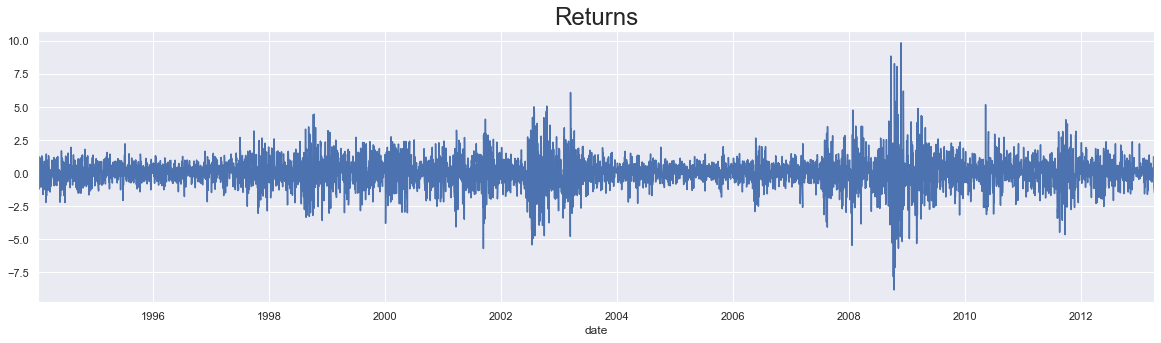

In [16]:
df.returns.plot(figsize = (20,5))
plt.title("Returns", size = 24)
plt.show()

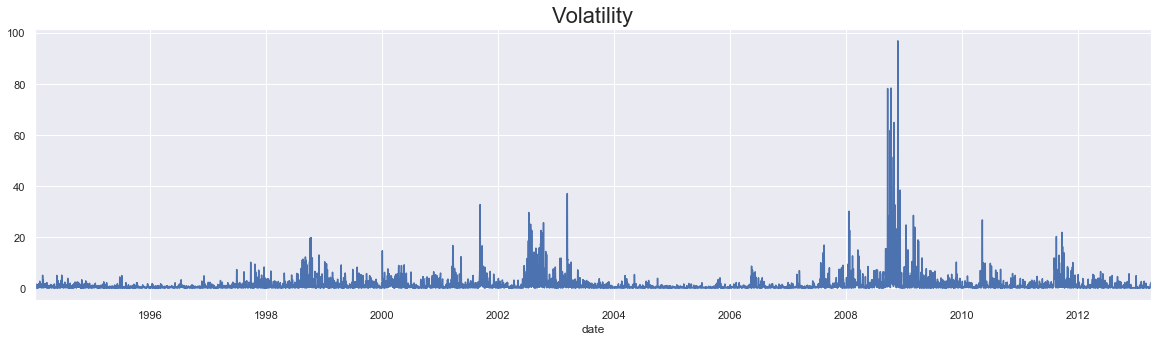

In [17]:
df.sq_returns.plot(figsize = (20,5))
plt.title("Volatility", size = 22)
plt.show()

## PACF

In [18]:
import statsmodels.graphics.tsaplots as sgt

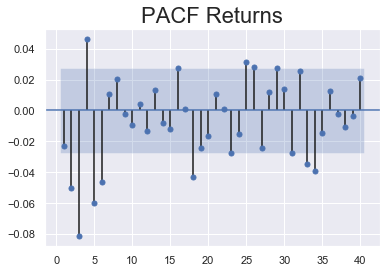

In [19]:
sgt.plot_pacf(df.returns[1:], lags = 40, zero = False, method = ('ols'))
plt.title('PACF Returns', size = 22)
plt.show()

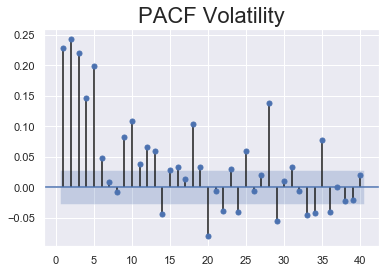

In [20]:
sgt.plot_pacf(df.sq_returns[1:], lags = 40, zero = False, method = ('ols'))
plt.title("PACF Volatility", size = 22)
plt.show()

### From the PACF for Volatility we can see that the first 6 cofficients are significant with the first 5 yeilding between 0.15 and 0.25

### Such High significant values of partal autocorrelation among the first few lags suggests that there tend to be short term trends in variance

### Another way of looking at it would be clustering. This suggests that there are periods of High Variation followed by periods of High Variation; Similarly,  there are periods of Low Variation followed by periods ofd Low Variation

## The arch_model() Method

In [21]:
!pip install ARCH

In [25]:
from arch import arch_model

ModuleNotFoundError: No module named 'arch'

In [26]:
import sys
import os

In [27]:
sys.path

['/Users/yashrandive/Documents/Time_Series_Analysis_Course_Programming/ARCH_Model',
 '/opt/anaconda3/lib/python37.zip',
 '/opt/anaconda3/lib/python3.7',
 '/opt/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/opt/anaconda3/lib/python3.7/site-packages',
 '/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/Users/yashrandive/.ipython']